<a href="https://colab.research.google.com/github/ashuy0517/-Netflix-Data-Cleaning-Analysis-and-Visualization/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary tools for analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline


In [2]:
# Upload your CSV file first (using the left-side upload button)

data = pd.read_csv('netflix1.csv')  # Change the file name if yours is different

# Display first 5 rows
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.info()   # Shows data type of each column
data.shape    # Shows total rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


(8790, 10)

In [4]:
data.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [5]:
data = data.drop_duplicates()


In [6]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


type
Movie      6126
TV Show    2664
Name: count, dtype: int64


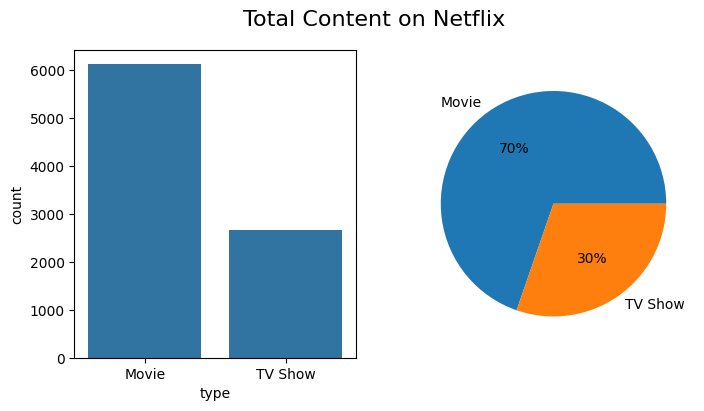

In [7]:
freq = data['type'].value_counts()
print(freq)

fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.countplot(data=data, x='type', ax=axes[0])
axes[1].pie(freq, labels=freq.index, autopct='%.0f%%')

fig.suptitle('Total Content on Netflix', fontsize=16)
plt.show()


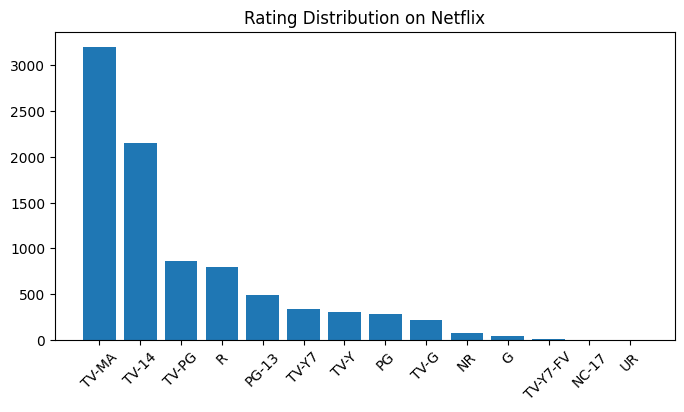

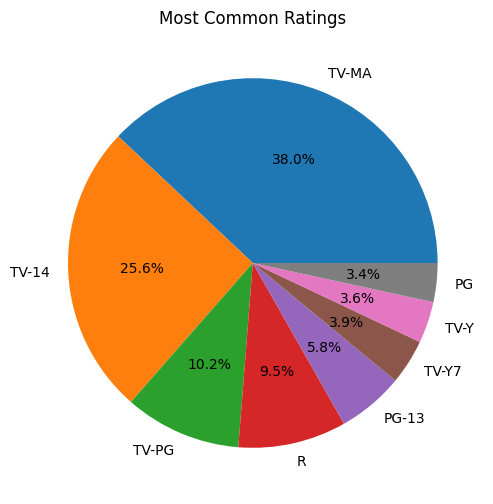

In [8]:
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating','count']

# Bar Chart
plt.figure(figsize=(8,4))
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45)
plt.title("Rating Distribution on Netflix")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%0.1f%%')
plt.title("Most Common Ratings")
plt.show()


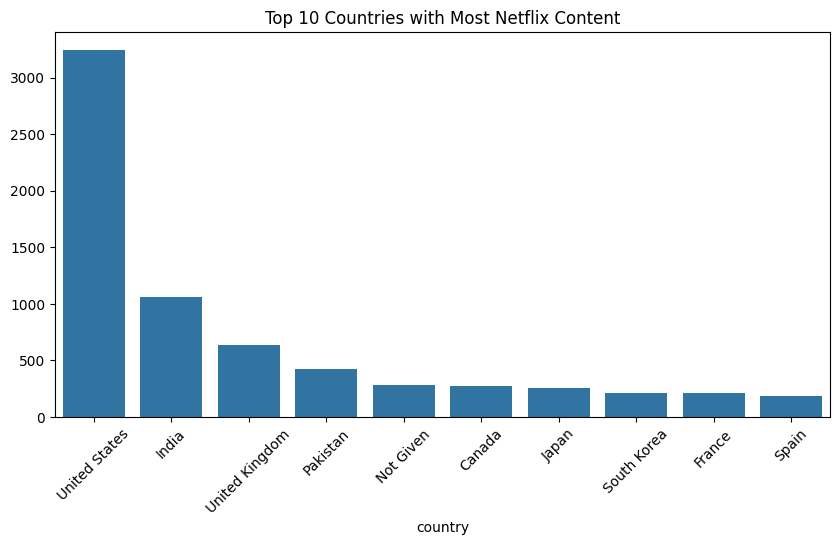

In [9]:
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Netflix Content")
plt.show()


In [10]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day


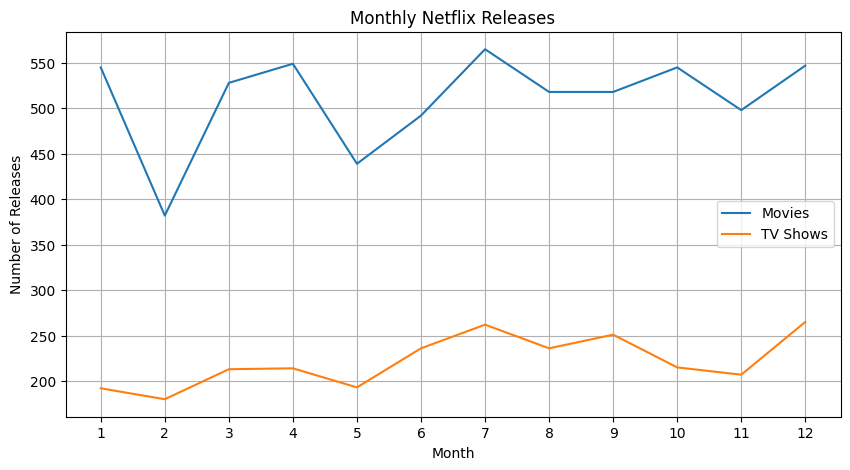

In [11]:
movie_month = data[data['type']=='Movie']['month'].value_counts().sort_index()
series_month = data[data['type']=='TV Show']['month'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(movie_month.index, movie_month.values, label='Movies')
plt.plot(series_month.index, series_month.values, label='TV Shows')
plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.title("Monthly Netflix Releases")
plt.legend()
plt.grid(True)
plt.show()


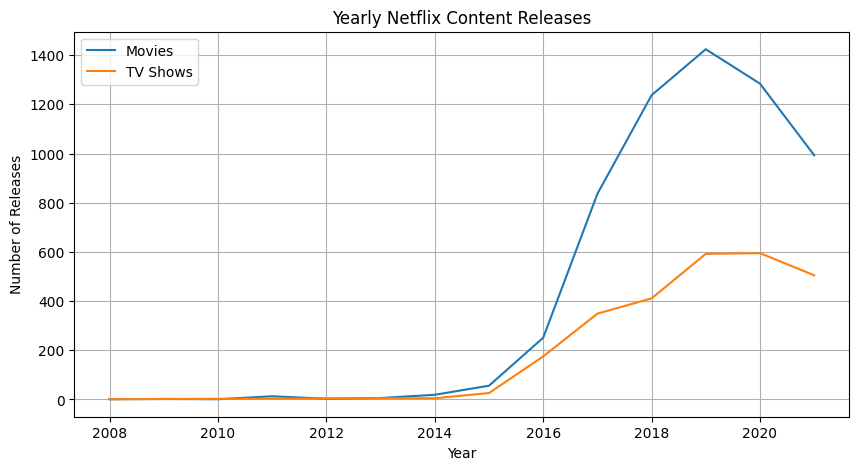

In [12]:
movie_year = data[data['type']=='Movie']['year'].value_counts().sort_index()
series_year = data[data['type']=='TV Show']['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(movie_year.index, movie_year.values, label="Movies")
plt.plot(series_year.index, series_year.values, label="TV Shows")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.title("Yearly Netflix Content Releases")
plt.legend()
plt.grid(True)
plt.show()


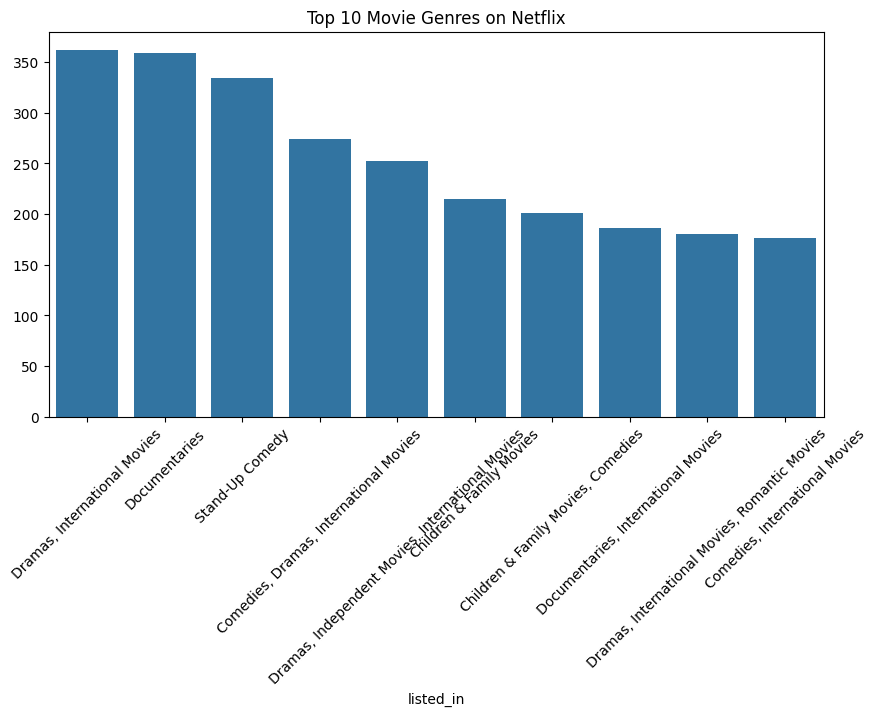

In [13]:
movie_genre = data[data['type']=='Movie']['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=movie_genre.index, y=movie_genre.values)
plt.xticks(rotation=45)
plt.title("Top 10 Movie Genres on Netflix")
plt.show()


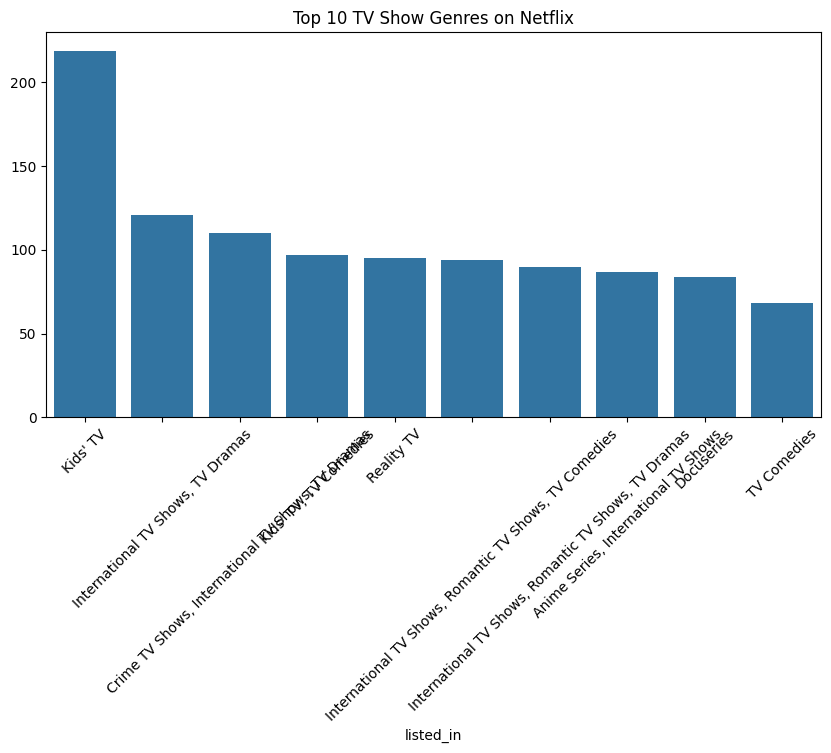

In [14]:
series_genre = data[data['type']=='TV Show']['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=series_genre.index, y=series_genre.values)
plt.xticks(rotation=45)
plt.title("Top 10 TV Show Genres on Netflix")
plt.show()


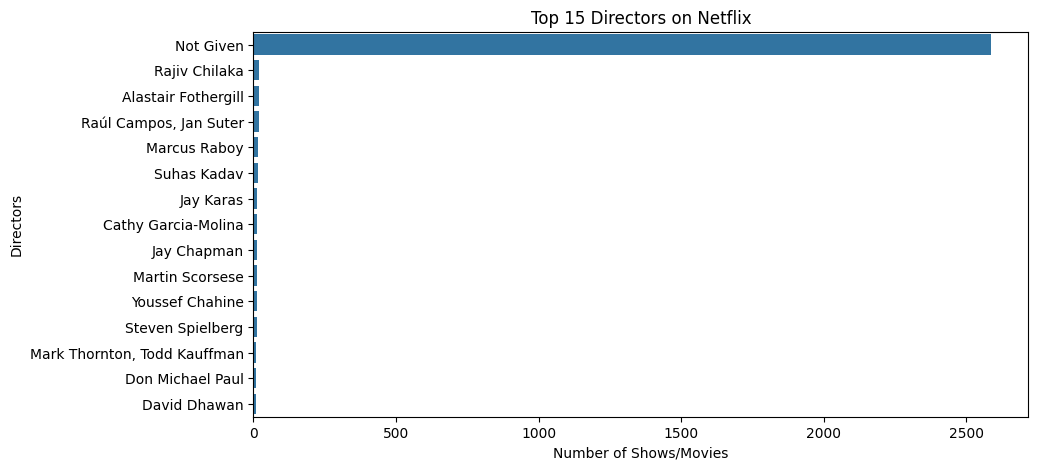

In [15]:
directors = data['director'].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(y=directors.index, x=directors.values)
plt.xlabel("Number of Shows/Movies")
plt.ylabel("Directors")
plt.title("Top 15 Directors on Netflix")
plt.show()
